In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
file_path = 'combined_accident_data.csv'  
df = pd.read_csv(file_path)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Num_Acc                        1000 non-null   object
 1   inverse_data                   1000 non-null   object
 2   week_day                       1000 non-null   object
 3   state                          1000 non-null   object
 4   severity                       1000 non-null   object
 5   weather                        1000 non-null   object
 6   location                       1000 non-null   object
 7   hrmn                           1000 non-null   int64 
 8   lum                            1000 non-null   object
 9   vehicle_type                   1000 non-null   object
 10  vehicle_model                  1000 non-null   object
 11  engine_size                    1000 non-null   int64 
 12  driver_sex                     1000 non-null   object
 13  driv

In [7]:
print(df['inverse_data'].head())
print(df['hrmn'].head())

0    2022-11-20
1    2023-12-09
2    2022-11-12
3    2023-02-13
4    2022-11-25
Name: inverse_data, dtype: object
0    1958
1    2245
2     250
3     545
4    2146
Name: hrmn, dtype: int64


In [8]:
df['hrmn'] = df['hrmn'].apply(lambda x: f"{int(x):04d}")
df['hour'] = df['hrmn'].str[:2]
df['minute'] = df['hrmn'].str[2:]
df['time_str'] = df['hour'] + ':' + df['minute']

df['datetime'] = pd.to_datetime(df['inverse_data'] + ' ' + df['time_str'], errors='coerce')

In [9]:
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

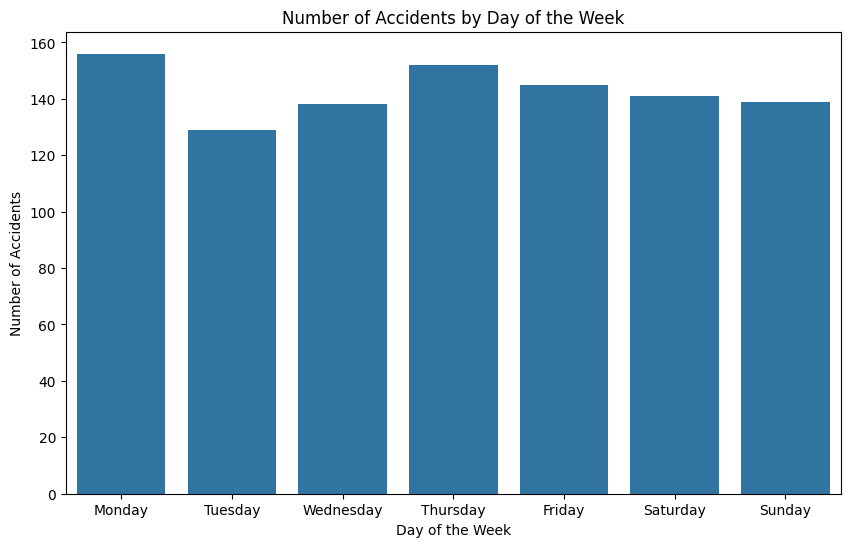

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

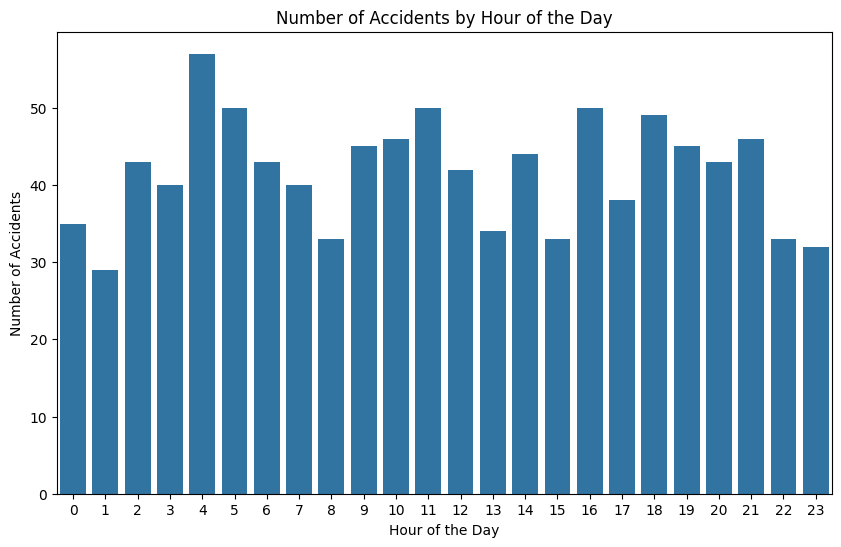

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

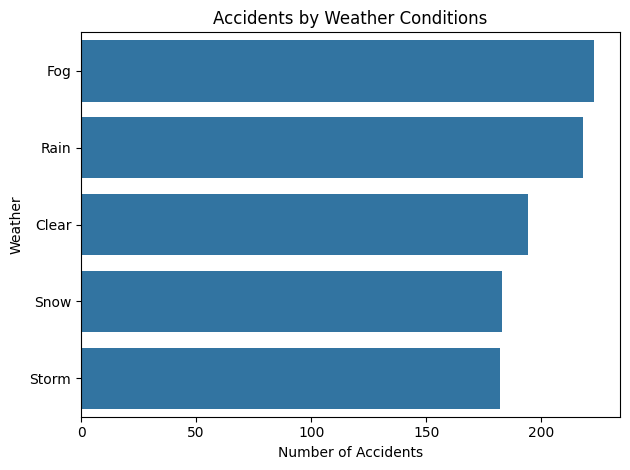

In [22]:
plt.figure()
sns.countplot(y='weather', data=df, order=df['weather'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather')
plt.tight_layout()
plt.show()

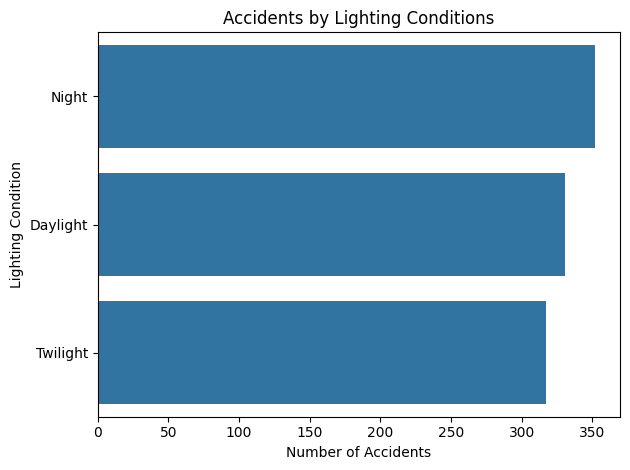

In [23]:
plt.figure()
sns.countplot(y='lum', data=df, order=df['lum'].value_counts().index)
plt.title('Accidents by Lighting Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Lighting Condition')
plt.tight_layout()
plt.show()

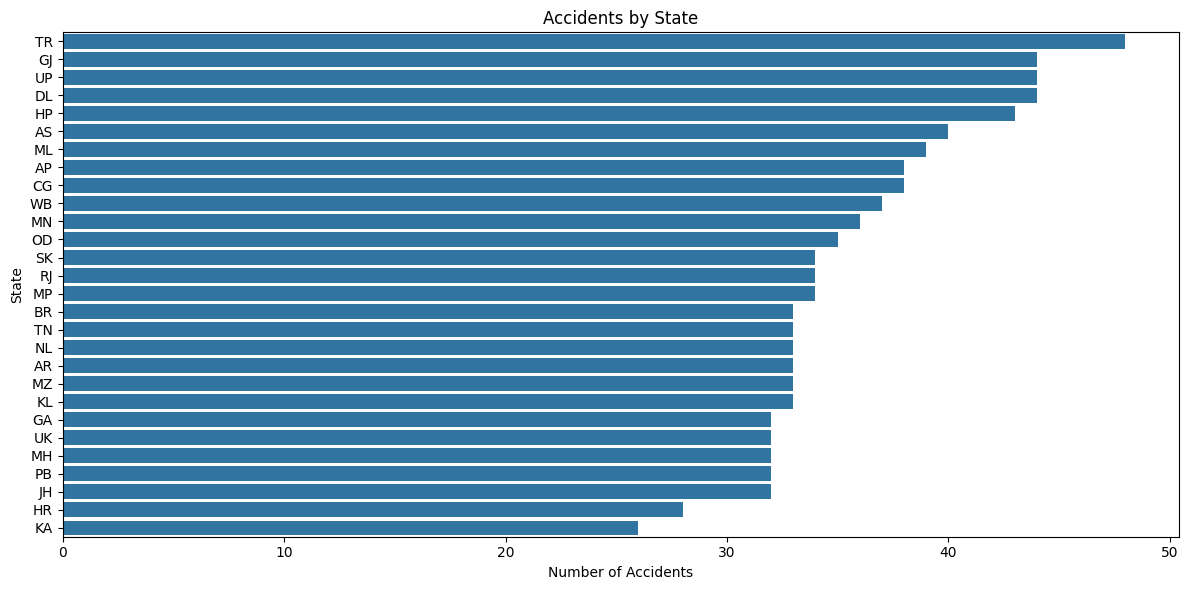

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y='state', data=df, order=df['state'].value_counts().index)
plt.title('Accidents by State')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.tight_layout()
plt.show()